<a href="https://colab.research.google.com/github/aiswaryathavva/ML-prajwal-sir/blob/main/KMeans_clustering_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv("Salary_Data(1).csv")

In [ ]:
df.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [ ]:
df.columns

Index(['YearsExperience', 'Age', 'Salary'], dtype='object')

Text(0, 0.5, 'salary')

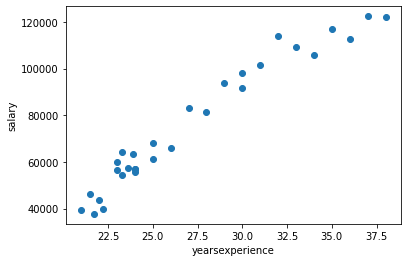

In [ ]:
plt.scatter(df.Age,df["Salary"])
plt.xlabel("yearsexperience")
plt.ylabel("salary")

In [ ]:
#ELBOW PLOT
sse=[]
k_rng=range(1,10)
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df[["Age","Salary"]])
  sse.append(km.inertia_)

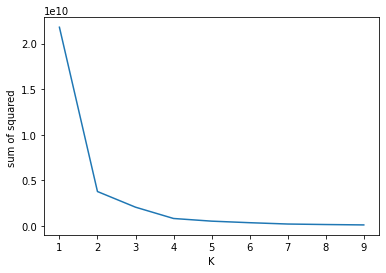

In [ ]:
plt.xlabel("K")
plt.ylabel("sum of squared ")
plt.plot(k_rng,sse)

In [ ]:
scaler=MinMaxScaler()
scaler.fit(df[["Salary"]])
df["Salary"]=scaler.transform(df[["Salary"]])
scaler.fit(df[["Age"]])
df["Age"]=scaler.transform(df[["Age"]])

In [ ]:
df.head()

,YearsExperience,Age,Salary
0,1.1,0.000000,0.019041
1,1.3,0.029412,0.100094
2,1.5,0.041176,0.000000
3,2.0,0.058824,0.068438
4,2.2,0.070588,0.025514


In [ ]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[["Age","Salary"]])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
df["cluster"]=y_predicted
df.head()

,YearsExperience,Age,Salary,cluster
0,1.1,0.000000,0.019041,1
1,1.3,0.029412,0.100094,1
2,1.5,0.041176,0.000000,1
3,2.0,0.058824,0.068438,1
4,2.2,0.070588,0.025514,1


In [ ]:
 km.cluster_centers_

array([[0.48039216, 0.63650287],
       [0.1366782 , 0.19890427],
       [0.82352941, 0.90880328]])

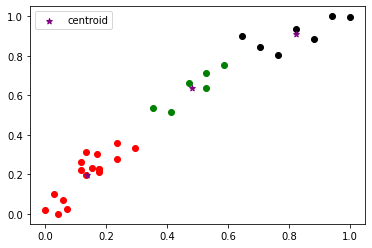

In [ ]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1["Salary"],color="green")
plt.scatter(df2.Age,df2["Salary"],color="red")
plt.scatter(df3.Age,df3["Salary"],color="black")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1]
            ,color="purple",marker="*",label="centroid")
plt.legend()